**Scikit-learn** (http://scikit-learn.org/) is an open-source machine learning library for Python that offers a variety of regression, classification and clustering algorithms.

In this section we'll perform a fairly simple classification exercise with scikit-learn. In the next section we'll leverage the machine learning strength of scikit-learn to perform natural language classifications.

# Classification Model In Different Ways

In [1]:
# Import all liberaries, modules, classes...
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC  
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier   

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay


## I. Spam /Ham Classification based numerical values (Length and punct)

For this exercise we'll be using the **SMSSpamCollection** dataset from [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) that contains more than 5 thousand SMS phone messages.<br>

The file is a [tab-separated-values](https://en.wikipedia.org/wiki/Tab-separated_values) (tsv) file with four columns:
> **label** - every message is labeled as either ***ham*** or ***spam***<br>
> **message** - the message itself<br>
> **length** - the number of characters in each message<br>
> **punct** - the number of punctuation characters in each message

In [2]:
df = pd.read_csv(r"..\ML_Text_Classification\TextFiles\smsspamcollection.tsv", sep= "\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
#len(df)

### Data Preparation
#### - Check for missing values:
Machine learning models usually require complete data.

In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

#### - Take a quick look at the *ham* and *spam* `label` column:

In [5]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<font color=green>We see that 4825 out of 5572 messages, or 86.6%, are ham.<br>This means that any machine learning model we create has to perform **better than 86.6%** to beat random chance.</font>

#### - Visualize the data:
Since we're not ready to do anything with the message text, let's see if we can predict ham/spam labels based on message length and punctuation counts. We'll look at message `length` first:

In [7]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<font color=green>This dataset is extremely skewed. The mean value is 80.5 and yet the max length is 910. Let's plot this on a logarithmic x-axis.</font>

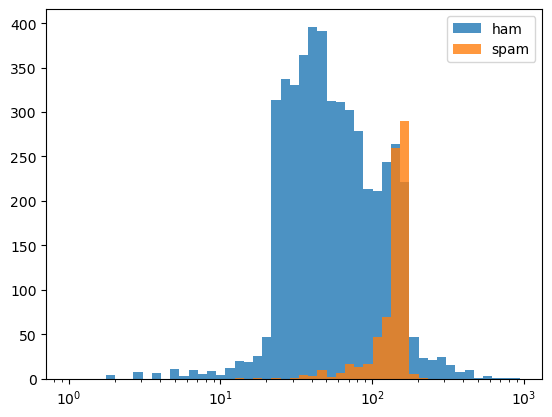

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green>It looks like there's a small range of values where a message is more likely to be spam than ham.</font>

Now let's look at the `punct` column:

In [9]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

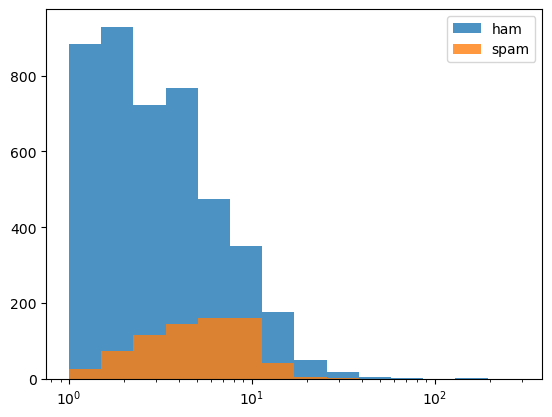

In [10]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green>This looks even worse - there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results.</font>

In [11]:
data = df.copy()

___
### Split the data into train & test sets:

If we wanted to divide the DataFrame into two smaller sets, we could use
> `train, test = train_test_split(df)`

For our purposes let's also set up our Features (X) and Labels (y). The Label is simple - we're trying to predict the `label` column in our data. For Features we'll use the `length` and `punct` columns. *By convention, **X** is capitalized and **y** is lowercase.*

#### 1. Selecting features
There are two ways to build a feature set from the columns we want. If the number of features is small, then we can pass those in directly:
> `X = df[['length','punct']]`

If the number of features is large, then it may be easier to drop the Label and any other unwanted columns:
> `X = df.drop(['label','message'], axis=1)`

These operations make copies of **df**, but do not change the original DataFrame in place. All the original data is preserved.

In [12]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

#### 2. Additional train/test/split arguments:
The default test size for `train_test_split` is 30%. Here we'll assign 33% of the data for testing.<br>
Also, we can set a `random_state` seed value to ensure that everyone uses the same "random" training & testing sets.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


Now we can pass these sets into a series of different training & testing algorithms and compare their results.

### Train and fit 

### 1. Logistic Regression classifier
One of the simplest multi-class classification tools is [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Scikit-learn offers a variety of algorithmic solvers; we'll use [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS). 

In [14]:
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression()

### Test the Accuracy of the Model

In [15]:
from sklearn import metrics
# Create a prediction set:
predictions = lr_model.predict(X_test)
# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [16]:
# You can make the confusion matrix less confusing by adding labels:
df_ham_spam=pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df_ham_spam 

,ham,spam
ham,1547,46
spam,241,5


<font color=green>These results are terrible! More spam messages were confused as ham (241) than correctly identified as spam (5), although a relatively small number of ham messages (46) were confused as spam.</font>

In [17]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [18]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.843936922240348


<font color=green>This model performed *worse* than a classifier that assigned all messages as "ham" would have!</font>

### 2.  support vector machine

Among the SVM options available, we'll use [C-Support Vector Classification (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [19]:
svm_model=SVC(gamma = 'auto')
svm_model.fit(X_train, y_train)
pred_svm = svm_model.predict(X_test)
print(pd.DataFrame(metrics.confusion_matrix(y_test, pred_svm), index=["ham", "spam"], columns=["Legitmate", "Fake"]))
print("****** // ****")
print("### classification report")
print(metrics.classification_report(y_test, pred_svm))

print("****** // ****")
print("### Accuracy sscore")
print(metrics.accuracy_score(y_test, pred_svm))

      Legitmate  Fake
ham        1515    78
spam        131   115
****** // ****
### classification report
              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839

****** // ****
### Accuracy sscore
0.8863512778684067


### 3.  Random Forest

In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

pred_rf = rf_model.predict(X_test)
print(pd.DataFrame(metrics.confusion_matrix(y_test, pred_rf), index=["ham", "spam"], columns=["Legitmate", "Fake"]))
print("****** // ****")
print("### classification report")
print(metrics.classification_report(y_test, pred_rf))

print("****** // ****")
print("### Accuracy sscore")
print(metrics.accuracy_score(y_test, pred_rf))

      Legitmate  Fake
ham        1503    90
spam        117   129
****** // ****
### classification report
              precision    recall  f1-score   support

         ham       0.93      0.94      0.94      1593
        spam       0.59      0.52      0.55       246

    accuracy                           0.89      1839
   macro avg       0.76      0.73      0.75      1839
weighted avg       0.88      0.89      0.88      1839

****** // ****
### Accuracy sscore
0.8874388254486134


___
### 4. Naïve Bayes classifier:
One of the most common - and successful - classifiers is [naïve Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

In [21]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
pred_nb = nb_model.predict(X_test)
print(pd.DataFrame(metrics.confusion_matrix(y_test, pred_nb), index=["ham", "spam"], columns=["Legitmate", "Fake"]))
print("****** // ****")
print("### classification report")
print(metrics.classification_report(y_test, pred_nb))

print("****** // ****")
print("### Accuracy sscore")
print(metrics.accuracy_score(y_test, pred_nb))


      Legitmate  Fake
ham        1583    10
spam        246     0
****** // ****
### classification report
              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839

****** // ****
### Accuracy sscore
0.8607939097335509


<font color=green>The total number of confusions dropped from **287** to **256**. [241+46=287, 246+10=256]</font>

<font color=green>Better, but still less accurate than 86%</font>

## II. ML Classification model based on NLP processor      
In this section we'll use basic Python to build a rudimentary NLP system. We'll build a *corpus of documents* (two small text files), create a *vocabulary* from all the words in both documents, and then demonstrate a *Bag of Words* technique to extract features from each document.<br>



In [22]:
# import addition Libarries
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer


### Split the data into train & test sets:

In [23]:
df.head(3)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6


In [24]:
X = df["message"]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Scikit-learn's CountVectorizer
Text preprocessing, tokenizing and the ability to filter out stopwords are all included in [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), which builds a dictionary of features and transforms documents to feature vectors.

In [25]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

<font color=green>This shows that our training set is comprised of 3733 documents, and 7082 features.</font>

### Transform Counts to Frequencies with Tf-idf
While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid this we can simply divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called **tf** for Term Frequencies.

Another refinement on top of **tf** is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called **tf–idf** for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html):

In [26]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

Note: the `fit_transform()` method actually performs two operations: it fits an estimator to the data and then transforms our count-matrix to a tf-idf representation.

### Combine Steps with TfidVectorizer
In the future, we can combine the CountVectorizer and TfidTransformer steps into one using [TfidVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html):

In [27]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

### Train a Classifier
Here we'll introduce an SVM classifier that's similar to SVC, called [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). LinearSVC handles sparse input better, and scales well to large numbers of samples.

In [28]:
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

<font color=green>Earlier we named our SVC classifier **svc_model**. Here we're using the more generic name **clf** (for classifier).</font>

### Build a Pipeline
Remember that only our training set has been vectorized into a full vocabulary. In order to perform an analysis on our test set we'll have to submit it to the same procedures. Fortunately scikit-learn offers a [**Pipeline**](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class that behaves like a compound classifier.

In [29]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

## Test the classifier and display results

In [30]:
# Form a prediction set
predictions = text_clf.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [31]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [32]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [33]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037


In [34]:
text_clf.predict(["Hey, How are you doing today?"])

array(['ham'], dtype=object)

In [35]:
text_clf.predict(["congratulation your benees lect Text 45869kjf"])

array(['spam'], dtype=object)

### Movie reviews Predictions

In [36]:
df = pd.read_csv(r"..\ML_Text_Classification\TextFiles\moviereviews.tsv", sep= "\t")
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [37]:
df['label'].value_counts()

neg    1000
pos    1000
Name: label, dtype: int64

In [38]:
#df['review'][0]

In [39]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [40]:
df.dropna(inplace=True)

In [41]:
blanks = []
# index, label, reciew text
for i,lb,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)

In [42]:
df.drop(blanks, inplace=True)

In [43]:
X = df["review"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [45]:
predictions = text_clf.predict(X_test)
confusion_matrix(y_test, predictions)

array([[259,  49],
       [ 49, 283]], dtype=int64)

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



In [47]:
print(accuracy_score(y_test, predictions))

0.846875


### Medical/disease --- Multiclass -Classification

In [48]:
df = pd.read_csv(r"..\ML_Text_Classification\TextFiles\reports.csv")
top_categories = df['medical_specialty'].value_counts().head(5).index
df = df[df['medical_specialty'].isin(top_categories)]
df.head()

,medical_specialty,report
0,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
1,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...
2,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart..."
3,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size...."
4,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc..."


In [49]:
df['medical_specialty'].value_counts()

Surgery                       1088
Cardiovascular / Pulmonary     371
Radiology                      273
Gastroenterology               224
Neurology                      223
Name: medical_specialty, dtype: int64

In [50]:
df.isnull().sum()

medical_specialty    0
report               0
dtype: int64

In [51]:
df.dropna(inplace=True)
blanks = []
# index, label, reciew text
for i,lb,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)
df.drop(blanks, inplace=True)

In [52]:
X = df["report"]
y = df["medical_specialty"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
                    ])

text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [54]:
predictions = text_clf.predict(X_test)
confusion_matrix(y_test, predictions)

array([[ 51,   1,   0,  21,  47],
       [  6,  14,   1,  12,  43],
       [  3,   1,  30,  26,   9],
       [ 15,   2,  25,  37,   5],
       [ 52,  35,   5,   5, 274]], dtype=int64)

In [55]:
print(classification_report(y_test, predictions))

                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.40      0.42      0.41       120
          Gastroenterology       0.26      0.18      0.22        76
                 Neurology       0.49      0.43      0.46        69
                 Radiology       0.37      0.44      0.40        84
                   Surgery       0.72      0.74      0.73       371

                  accuracy                           0.56       720
                 macro avg       0.45      0.44      0.44       720
              weighted avg       0.56      0.56      0.56       720



In [56]:
print(accuracy_score(y_test, predictions))

0.5638888888888889


#### Option II

In [57]:
import re
import spacy
from sklearn.decomposition import PCA
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    doc = nlp(text)
    text = ' '.join(token.lemma_ for token in doc if token.text.lower() not in STOP_WORDS and token.is_alpha)
    return text

df['cleaned_transcription'] = df['report'].apply(clean_text)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_transcription'])

pca = PCA(n_components=50, random_state=42)
pca_transformed = pca.fit_transform(tfidf_matrix.toarray())

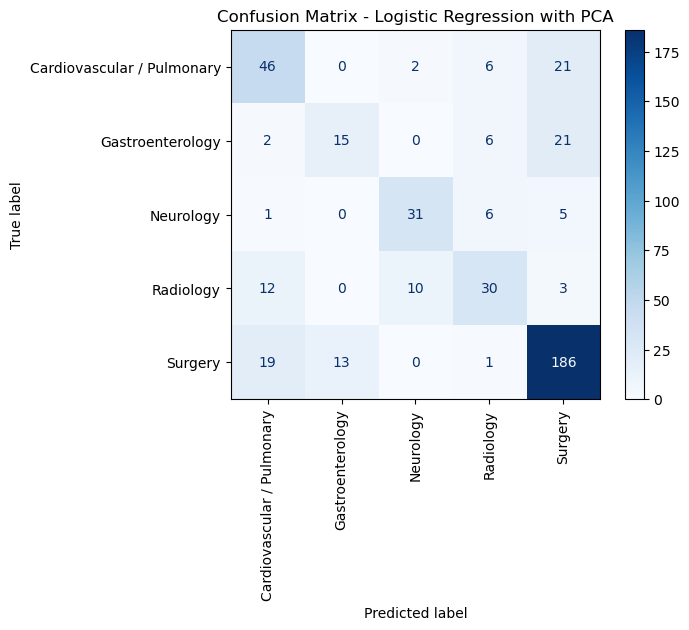

Classification Report:
                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.57      0.61      0.59        75
          Gastroenterology       0.54      0.34      0.42        44
                 Neurology       0.72      0.72      0.72        43
                 Radiology       0.61      0.55      0.58        55
                   Surgery       0.79      0.85      0.82       219

                  accuracy                           0.71       436
                 macro avg       0.65      0.61      0.63       436
              weighted avg       0.70      0.71      0.70       436



In [58]:
labels = df['medical_specialty'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(pca_transformed, labels, test_size = 0.2, random_state = 42)
lr_model = LogisticRegression(random_state = 42, max_iter = 1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=df['medical_specialty'].astype('category').cat.categories)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix - Logistic Regression with PCA")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=df['medical_specialty'].astype('category').cat.categories))


## III. GeneAI FineTuning Text Classification    